In [7]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np


filename = 'df_imputed__OHE_cat_std_num.pkl'



#filename = 'df_imputed_tot_OHE.pkl'
df = pd.read_pickle(filename)
X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


In [8]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [9]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=100):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, n_jobs= -1)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [11]:
#Building Models according to the best hyperparameters
#found by RandomSearchCV
pprint('-- Model Linear_SVM')
model_Linear_SVM=svm.SVC(kernel='linear',C=0.01,gamma=10000, probability=True)
pprint('-- Model RBF SVM')
model_RBF_SVM = svm.SVC(kernel='rbf',C=1000,gamma=1e-05, probability=True)
pprint('-- Model Logistic Regression')
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 0.01)
pprint('-- Model Decision Tree')
model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
            max_features=None, max_leaf_nodes=15, min_samples_leaf=4,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
pprint('-- Model Random Forest')
model_RandomForest = RandomForestClassifier(n_estimators= 200,
               max_features= 'auto',
               max_depth= 20,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)
pprint('-- Model K-NN')
model_KNN = KNeighborsClassifier(n_neighbors=22)




pprint('--------FINISH MODELS CREATED')

'-- Model Linear_SVM'
'-- Model RBF SVM'
'-- Model Logistic Regression'
'-- Model Decision Tree'
'-- Model Random Forest'
'-- Model K-NN'
'--------FINISH MODELS CREATED'


In [12]:
# dict of parameter list/distributions to sample
n_estimators_search=list(range(100,1100,100))
param_dist = {"n_estimators": n_estimators_search}

pprint('----Random Search Decision Tree\n')
bagged_DT = BaggingClassifier(base_estimator=model_Decision_Tree, random_state = 34)
DT_rs = run_randomsearch(X, y, bagged_DT, param_dist, cv=10,
                         n_iter_search=10)



pprint('----Random Search SVM_Linear\n')
bagged_SVM_Linear = BaggingClassifier(base_estimator=model_Linear_SVM, random_state = 36)
SVM_Linear_rs = run_randomsearch(X, y, bagged_SVM_Linear, param_dist, cv=10,
                         n_iter_search=10)



pprint('----Random Search SVM_RBF\n')
bagged_SVM_RBF = BaggingClassifier(base_estimator=model_RBF_SVM, random_state = 37)
SVM_RBF_rs = run_randomsearch(X, y, bagged_SVM_RBF, param_dist, cv=10,
                         n_iter_search=10)


pprint('----Random Search Logistic_Regression\n')
bagged_Logistic_Regression = BaggingClassifier(base_estimator=model_Logistic_Regression, random_state = 38)
Logistic_Regression_rs = run_randomsearch(X, y, bagged_Logistic_Regression, param_dist, cv=10,
                         n_iter_search=10)




pprint('----Random Search K = 22 - NN\n')
bagged_model_KNN= BaggingClassifier(base_estimator=model_KNN, random_state = 38)
model_KNN_rs = run_randomsearch(X, y, bagged_model_KNN, param_dist, cv=10,
                         n_iter_search=10)





'----Random Search Decision Tree\n'

RandomizedSearchCV took 30.11 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.767 (std: 0.039)
Parameters: {'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.764 (std: 0.045)
Parameters: {'n_estimators': 600}

Model with rank: 3
Mean validation score: 0.763 (std: 0.046)
Parameters: {'n_estimators': 400}

'----Random Search SVM_Linear\n'

RandomizedSearchCV took 264.23 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.018)
Parameters: {'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.795 (std: 0.019)
Parameters: {'n_estimators': 300}

Model with rank: 3
Mean validation score: 0.795 (std: 0.019)
Parameters: {'n_estimators': 400}

'----Random Search SVM_RBF\n'

RandomizedSearchCV took 407.02 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.789 (std: 0.025)
Parameters: {'n_estimators': 40

In [13]:
bagged_DT_model = BaggingClassifier(base_estimator= model_Decision_Tree, n_estimators =  100, random_state = 34)
bagged_SVM_Linear_model = BaggingClassifier(base_estimator=model_Linear_SVM, n_estimators =  200, random_state = 36)
bagged_SVM_RBF_model =  BaggingClassifier(base_estimator=model_RBF_SVM, n_estimators =  400 ,random_state = 37)
bagged_Logistic_Regression_model = BaggingClassifier(base_estimator=model_Logistic_Regression,  n_estimators =  400, random_state = 38)
bagged_model_KNN= BaggingClassifier(base_estimator=model_KNN, n_estimators =  100, random_state = 38)
rfc_best = RandomForestClassifier(n_estimators= 400,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)

In [17]:



from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

classifiers=['Linear SVM','Radial SVM','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[bagged_SVM_Linear_model, bagged_SVM_RBF_model, bagged_Logistic_Regression_model, bagged_model_KNN, bagged_DT_model, rfc_best ]



fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)



Model: BaggingClassifier(base_estimator=SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10000, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=36, verbose=0, warm_start=False)
Model: BaggingClassifier(base_estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=400, n_jobs=1, oob_score=False,
         random_state=37, verbose=0, warm_start=False)
Model: BaggingClassifier(base_estimator=LogisticRegression(C=0.01, class_weig

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Linear SVM,0.795575,0.062024,0.807849,0.010289
Radial SVM,0.784764,0.066878,0.803744,0.010132
Logistic Regression,0.797749,0.074869,0.806400,0.008209
KNN,0.780392,0.072765,0.810868,0.006842
Decision Tree,0.793354,0.070653,0.828139,0.007139
Random Forest,0.782566,0.066878,0.869926,0.005698


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Linear SVM,0.817975,0.051302,0.828777,0.009470
Radial SVM,0.809257,0.056304,0.825792,0.009357
Logistic Regression,0.821518,0.064357,0.828546,0.007028
KNN,0.810198,0.061101,0.835914,0.005915
Decision Tree,0.825620,0.053338,0.853614,0.006025
Random Forest,0.810508,0.053804,0.886829,0.005042


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Linear SVM,0.816478,0.077549,0.817293,0.009164
Radial SVM,0.802383,0.077730,0.811282,0.008289
Logistic Regression,0.810127,0.079806,0.812337,0.008691
KNN,0.783491,0.077496,0.803803,0.007252
Decision Tree,0.784952,0.074348,0.807252,0.007361
Random Forest,0.793363,0.077518,0.854944,0.004552


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Linear SVM,0.827294,0.072001,0.840645,0.011972
Radial SVM,0.823373,0.075740,0.840863,0.011632
Logistic Regression,0.841059,0.087314,0.845449,0.007016
KNN,0.846902,0.086140,0.870770,0.008670
Decision Tree,0.874314,0.043901,0.905696,0.008624
Random Forest,0.837137,0.076311,0.921196,0.006511


,Fit_time,Scoring Time
Linear SVM,8.006745,0.955066
Radial SVM,17.023928,2.023197
Logistic Regression,0.927170,0.103562
KNN,0.147511,1.253441
Decision Tree,0.374467,0.069725
Random Forest,0.977181,0.208425


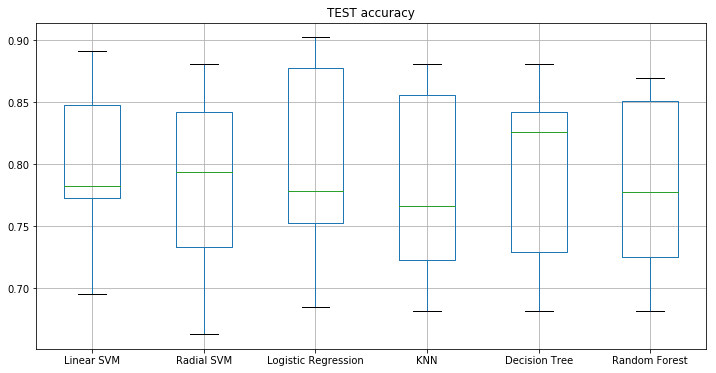

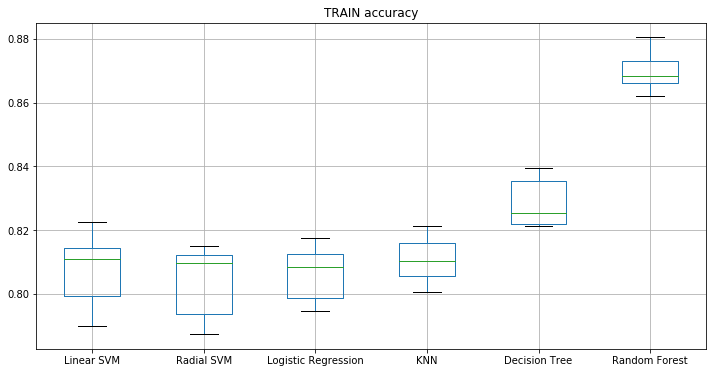

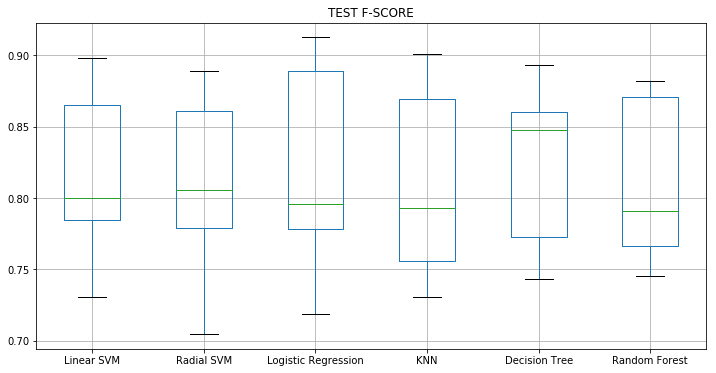

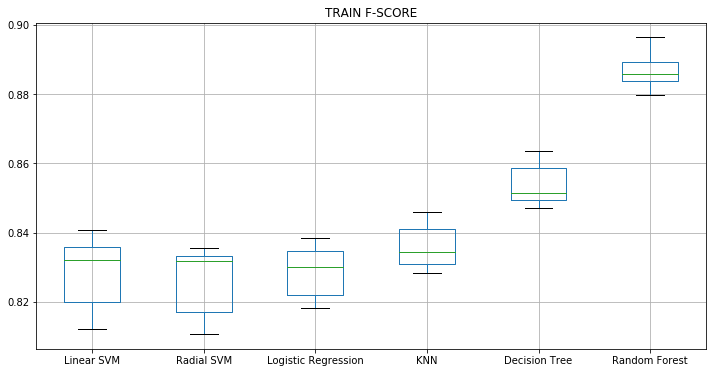

In [18]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total,index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()




In [25]:
f,ax=plt.subplots(2,3,figsize=(12,6))
y_pred = cross_val_predict(bagged_SVM_RBF_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(bagged_SVM_Linear_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(bagged_model_KNN,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(rfc_best,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(bagged_Logistic_Regression_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(bagged_DT_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
plt.show()

Text(0.5,1,'Matrix for Decision Tree')

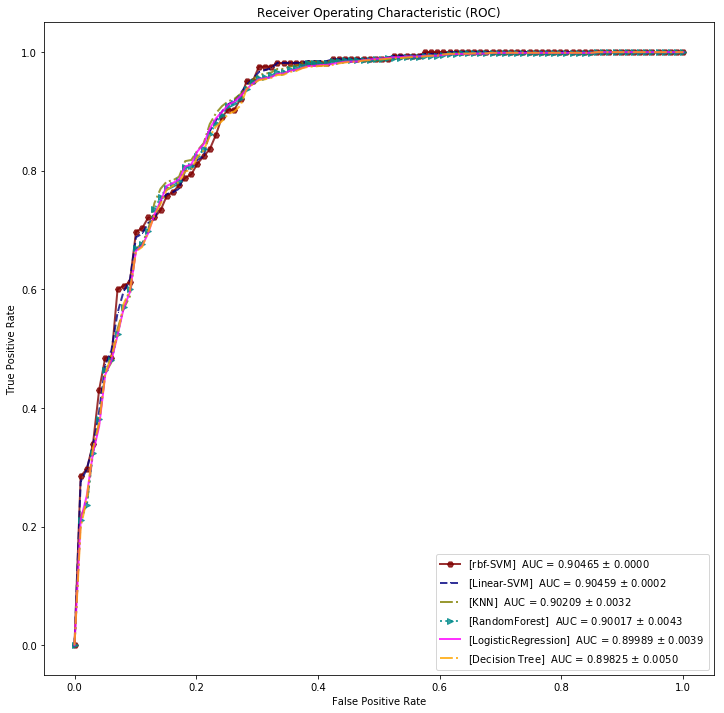

,AUC Mean,std
rbf-SVM,0.904653,0.000000
Linear-SVM,0.904591,0.000218
KNN,0.902093,0.003242
RandomForest,0.900172,0.004345
LogisticRegression,0.899893,0.003927
Decision Tree,0.898246,0.005038


In [19]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#'aqua', 'darkorange', 'cornflowerblue'
models = [
    {
        'label' : 'rbf-SVM',
        'model': bagged_SVM_RBF_model,
        'color': 'maroon',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': bagged_SVM_Linear_model,
        'color': 'navy',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': bagged_model_KNN, 
        'color': 'olive',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    {
        'label' : 'RandomForest',
        'model': rfc_best,
        'color': 'darkcyan',
        'linestyle': 'dotted',
        'markers': '>',
       
    },        
    {
        'label' : 'LogisticRegression',
        'model': bagged_Logistic_Regression_model,
        'color': 'fuchsia',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': bagged_DT_model, 
        'color': 'orange',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
std_mean = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    aucs_mean.append(mean_auc)
    std_mean.append(std_auc)
    labels.append(m['label']) 
    



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()
AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':std_mean },index = labels)       
AUCs


